In [35]:
import sys, os
sys.path.append(os.pardir)  # 親ディレクトリのファイルをインポートするための設定
import numpy as np
import pickle
from kadai_3.dataset.mnist import load_mnist
from kadai_3.common.functions import sigmoid, softmax
from matplotlib import pyplot as plt

%inline matplotlib

def get_data():
    (x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, flatten=True, one_hot_label=False)
    return x_test, t_test


def init_network():
    with open("kadai_3/sample_weight.pkl", 'rb') as f:
        network = pickle.load(f)
    return network


def predict(network, x):
    W1, W2, W3 = network['W1'], network['W2'], network['W3']
    b1, b2, b3 = network['b1'], network['b2'], network['b3']

    a1 = np.dot(x, W1) + b1
    z1 = sigmoid(a1)
    a2 = np.dot(z1, W2) + b2
    z2 = sigmoid(a2)
    a3 = np.dot(z2, W3) + b3
    y = softmax(a3)

    return y


x, t = get_data()

ERROR:root:Line magic function `%inline` not found.


/Users/kyohei/.pyenv/versions/3.5.3/lib/python3.5/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['IPAexGothic'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


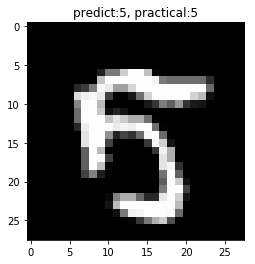

In [36]:
network = init_network()
import random
rand_idx = random.randrange(len(x))
y = predict(network,x[rand_idx])
p = np.argmax(y)

plt.imshow(x[rand_idx].reshape(28,28),'gray')
plt.title("predict:{}, practical:{}".format(p,t[rand_idx]))
plt.show()


/Users/kyohei/.pyenv/versions/3.5.3/lib/python3.5/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['IPAexGothic'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


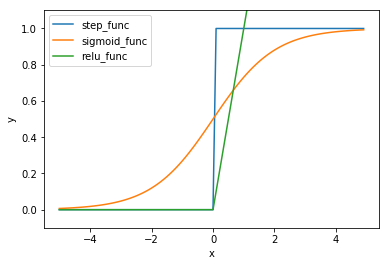

In [37]:
def step_function(x):
    return np.array(x > 0, dtype=np.int) # numpy int型で返す
def sigmoid(x):
    return 1/ (1 + np.exp(-x))
def relu(x):
    return np.maximum(0, x)

x = np.arange(-5.0, 5.0, 0.1)
y_step = step_function(x)
y_sigmoid = sigmoid(x)
y_relu = relu(x)
plt.plot(x, y_step, label="step_func")
plt.plot(x, y_sigmoid, label="sigmoid_func")
plt.plot(x,y_relu, label="relu_func")
plt.ylim(-0.1, 1.1)

plt.xlabel("x")
plt.ylabel("y")

plt.legend()
plt.show()